# Initial Assessment: SPY
In this project, we will rerun our base initial assessment workflow on SPY.
However, we will be calling the refactored functions as opposed to writing it inline. 
SPY is the NYSEARCA ticker for the SPDR S&P 500 ETF Trust.
This ETF follows the S&P 500 index with a target price of S&P500*.01 and beta=1.
This workflow uses all historical data to assess simple trend fitting, autocorrelation and
robust statistics for estimating risk and return metrics.
The goal is to identify:
* sample freq;
* sample period;
* deviation event lengths (particularly for re allocation timeframes); and
* expected returns as a function of hold time.


## Setup

<class 'pandas.core.frame.DataFrame'>
Index: 8091 entries, 8090 to 0
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         8091 non-null   datetime64[ns]
 1   Open         8091 non-null   object        
 2   High         7964 non-null   float64       
 3   Low          7964 non-null   float64       
 4   Close*       7964 non-null   float64       
 5   Adj Close**  7964 non-null   float64       
 6   Volume       7964 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 505.7+ KB


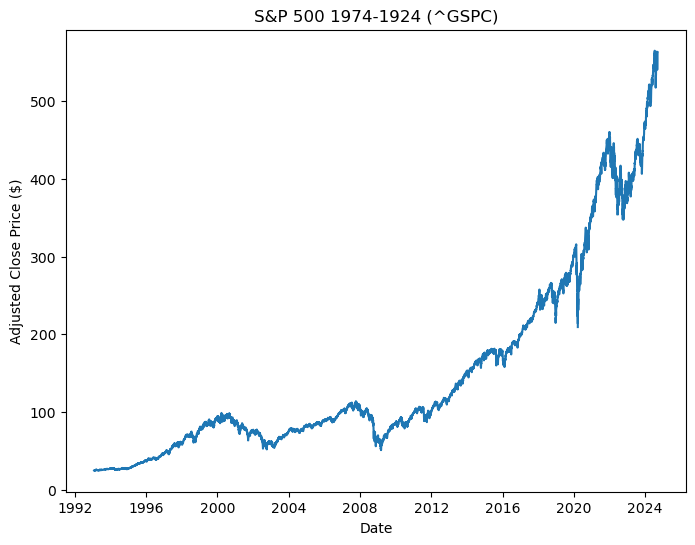

In [2]:
# Paths

# Analytics dir path *USER SET*
analyticsDir = '/Users/rtasseff/projects/condor_test/analytics'
# Data dir path *USER SET*
dataDir = '/Users/rtasseff/projects/tmp'

########################

## Setting paths in python
#import sys
#sys.path.insert(0, analyticsDir)

# Imports
#from data_mining import fetch_tickers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from statsmodels.tsa import stattools

spy_history = pd.read_csv(dataDir+'/spy_MAX.tab', sep='\t')

# Convert date column to datetime
spy_history['Date'] = pd.to_datetime(spy_history['Date'])

# Preference to see data start to end so flip it
spy_history.sort_values('Date', axis=0, ascending=True, inplace=True)

#take a look
spy_history.info()
spy_history

# Plot the data for sanity check
plt.figure(figsize=(8, 6))
plt.plot(spy_history['Date'], spy_history['Adj Close**'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ($)')
plt.title('S&P 500 1974-1924 (^GSPC)')
plt.show()